In [1]:
import collections
import math 
import pandas as pd
import numpy as np
from scipy.special import perm # for nPk 
from sympy.functions.combinatorial.numbers import stirling
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

## Functions

In [2]:
def trailing_zero(n):
    x = int(bin(n)[2:])
    count = 0
    while ((x & 1 ) == 0):
        x = x >> 1
        count += 1
    return count

def report_number(K, I):
    r = [[0]* (I + 1) for _ in range(K+1)]
    r[1][1] = 1
    for k in range(2, K+1):
        b = trailing_zero(k-1)
        for i in range(1, I+1):
            r[k][i] = r[k-1][i] + r[k-1][i-1] - r[k-1- int(math.pow(2,b))][i-1]
    return r

In [3]:
I = 300
K = 300
a = report_number(K, I)

In [4]:
def uni_ore_bayes(n, k):
    outputs = 0
    for c in range(n):
        if k < c+1:
            break
        outputs = outputs + (stirling(n, c+1) * math.factorial(c+1))
    inputs = pow(k, n)
    return outputs / inputs

In [5]:
def uni_ore_clww_bayes(n, k, M):
    outputs = 0
    for i in range(n):
        if k < i+1:
            break
        outputs = outputs + stirling(n, i+1) * math.factorial(i+1) * M[k][i+1]
    inputs = pow(k, n)
    return outputs / inputs

In [6]:
n = 5
k = 16
M = a
print(uni_ore_clww_bayes(n, k, M))

16801/1048576


## Graphs

In [7]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [8]:
s_list = [2, 4, 8, 16, 32]
Ideal_list = [738481/2097152, 347761/4194304, 48601/8388608, 4501/16777216, 541/33554432]
CLWW_list = []
n = 5
k = 2
clww = uni_ore_clww_bayes(n, k, M)
CLWW_list.append(clww)
k = 4
clww = uni_ore_clww_bayes(n, k, M)
CLWW_list.append(clww)
k = 8
clww = uni_ore_clww_bayes(n, k, M)
CLWW_list.append(clww)
k = 16
clww = uni_ore_clww_bayes(n, k, M)
CLWW_list.append(clww)
k = 32
clww = uni_ore_clww_bayes(n, k, M)
CLWW_list.append(clww)
s_df = pd.DataFrame(
        {'s':s_list,
         'postIdeal':Ideal_list,
         'postCLWW': CLWW_list
        }
    )

In [9]:
s_df

,s,postIdeal,postCLWW
0,2,0.3521351814,31/32
1,4,0.0829126835,601/1024
2,8,0.0057936907,4351/32768
3,16,0.0002682805,16801/1048576
4,32,0.0000161231,46351/33554432


In [10]:
def graph_it_bucket(s_range, df):
    ax = plt.figure().gca()
    plt.plot('s', 'postIdeal',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="Ideal")
    plt.plot('s', 'postCLWW',
             color='red',
             data=df,
             linestyle='dotted',
             marker='', 
             label="CLWW")
    plt.xlabel('s')
    plt.xticks(df['s'])
    plt.xlim(left = 0, right = s_range+1)
    plt.gca().invert_xaxis()
    plt.ylabel('Bucket vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('CLWW vs Ideal ORE Bucket vulnerability')
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

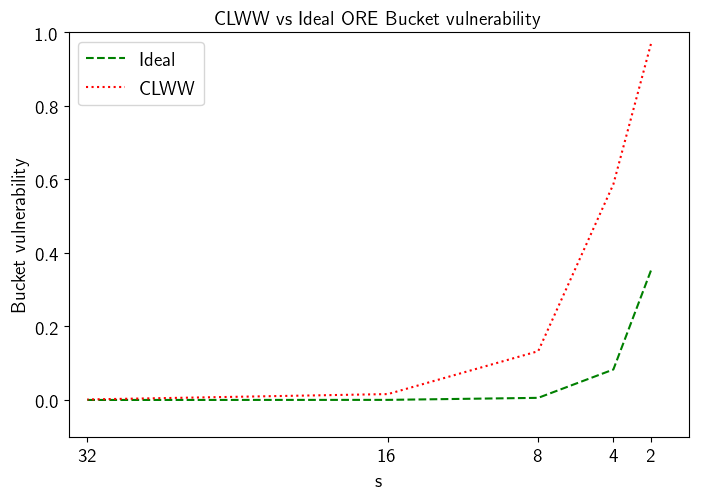

In [11]:
graph_it_bucket(32, s_df)